使用VGG16的结构提取图像特征，再根据特征建立mlp模型，实现猫狗图像识别。
训练/测试数据:dataset\data_vgs
1.对数据进行分离、计算测试数据预测准确率
2.从网站下载猫/狗图片，对其进行预测

mlp模型一个隐藏层，10个神经元

In [1]:
#load data
from keras.utils import load_img, img_to_array
import numpy as np
#pic_name = 'dog.png'
pic_name = 'cat.png'
pic = load_img(pic_name, target_size=(224, 224))
pic = img_to_array(pic)
type(pic)
pic.shape

2025-12-08 09:20:19.984389: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-08 09:20:20.268280: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-08 09:20:20.328758: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765156820.463567    3606 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765156820.492280    3606 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765156820.746195    3606 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

(224, 224, 3)

In [3]:
from keras.applications.vgg16 import VGG16, preprocess_input
#建立vgg16 模型，不包含顶层的全连接层
model_vgg = VGG16(weights='imagenet', include_top=False)
#增加维度
x = np.expand_dims(pic, axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


In [5]:
#特征提取
features = model_vgg.predict(x)
print(features.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
(1, 7, 7, 512)


In [6]:
#flatten
features_flat = features.reshape(1, 7*7*512)
print(features_flat.shape)

(1, 25088)


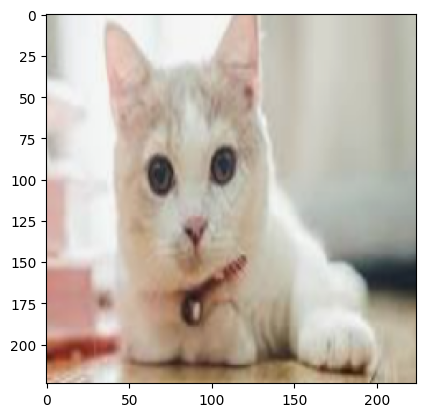

In [7]:
#visualize image
from matplotlib import pyplot as plt
fig = plt.figure()
img = load_img(pic_name, target_size=(224, 224))
plt.imshow(img)

In [ ]:
from pathlib import Path

def get_all_files_pathlib(root_dir):
    """
    使用 pathlib 遍历目录及其子目录，获取所有文件路径
    """
    root_path = Path(root_dir)
    file_list = [str(file_path) for file_path in root_path.rglob('*') if file_path.is_file()]
    return file_list

# 使用示例
all_files = get_all_files_pathlib("cats_and_dogs_filtered/train/")
for file_path in all_files:
    pic = load_img(file_path, target_size=(224, 224))
    pic = img_to_array(pic)

cats_and_dogs_filtered/train/dogs/dog.127.jpg
cats_and_dogs_filtered/train/dogs/dog.126.jpg
cats_and_dogs_filtered/train/dogs/dog.125.jpg
cats_and_dogs_filtered/train/dogs/dog.124.jpg
cats_and_dogs_filtered/train/dogs/dog.123.jpg
cats_and_dogs_filtered/train/dogs/dog.122.jpg
cats_and_dogs_filtered/train/dogs/dog.121.jpg
cats_and_dogs_filtered/train/dogs/dog.120.jpg
cats_and_dogs_filtered/train/dogs/dog.119.jpg
cats_and_dogs_filtered/train/dogs/dog.118.jpg
cats_and_dogs_filtered/train/dogs/dog.117.jpg
cats_and_dogs_filtered/train/dogs/dog.116.jpg
cats_and_dogs_filtered/train/dogs/dog.115.jpg
cats_and_dogs_filtered/train/dogs/dog.114.jpg
cats_and_dogs_filtered/train/dogs/dog.113.jpg
cats_and_dogs_filtered/train/dogs/dog.112.jpg
cats_and_dogs_filtered/train/dogs/dog.111.jpg
cats_and_dogs_filtered/train/dogs/dog.110.jpg
cats_and_dogs_filtered/train/dogs/dog.109.jpg
cats_and_dogs_filtered/train/dogs/dog.108.jpg
cats_and_dogs_filtered/train/dogs/dog.107.jpg
cats_and_dogs_filtered/train/dogs/